In [81]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 7
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [90]:
turk = pt.Turk(trial_inputs)

Number of HITs: 159
Reviewable Assignments: 48


In [91]:
trial_data = turk.getTaskData()

In [87]:
turk.Overwrite=True
turk.getTaskData()

[{'Mask_Name': 'SemImage108_GF7T6.png',
  'Image_ID': '108',
  'AssignmentID': '31Z0PCVWUKF1IR65NS9HOWI9YGF7T6',
  'Worker': 'AF3K80U0YQJMZ',
  'Answer': [{'label': 'Nucleus',
    'vertices': [{'x': 589, 'y': 98},
     {'x': 626, 'y': 85},
     {'x': 686, 'y': 96},
     {'x': 768, 'y': 111},
     {'x': 809, 'y': 127},
     {'x': 846, 'y': 136},
     {'x': 855, 'y': 160},
     {'x': 839, 'y': 191},
     {'x': 820, 'y': 196},
     {'x': 728, 'y': 183},
     {'x': 637, 'y': 162},
     {'x': 569, 'y': 143},
     {'x': 588, 'y': 116}]},
   {'label': 'Nucleus',
    'vertices': [{'x': 560, 'y': 49},
     {'x': 589, 'y': 74},
     {'x': 660, 'y': 76},
     {'x': 733, 'y': 89},
     {'x': 771, 'y': 89},
     {'x': 773, 'y': 47},
     {'x': 722, 'y': 20},
     {'x': 638, 'y': 18},
     {'x': 591, 'y': 11},
     {'x': 569, 'y': 16},
     {'x': 547, 'y': 29}]},
   {'label': 'Nucleus',
    'vertices': [{'x': 600, 'y': 182},
     {'x': 566, 'y': 216},
     {'x': 569, 'y': 243},
     {'x': 600, 'y': 

## Preview Results

In [92]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    rgbimg = Image.new("RGBA", bg.size)
    rgbimg.paste(bg)
    fg = Image.open(paths[1])
    rgbimg.paste(fg, (0, 0), fg)
    rgbimg.thumbnail((150, 150), Image.LANCZOS)
    return rgbimg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

,Worker,Preview,Score,Approved
0,AF3K80U0YQJMZ,,10,False
1,A2EBYJVHW8NGM2,,10,False
2,A234WZ4KX8IW07,,10,False
3,A1XGHGHD0LCPXJ,,10,False
4,AF3K80U0YQJMZ,,10,False
5,AF3K80U0YQJMZ,,10,False
6,AF3K80U0YQJMZ,,10,False
7,A1N52WM88S6JXY,,10,False
8,A3V6XE43H0BFC9,,10,False
9,A1XGHGHD0LCPXJ,,10,False

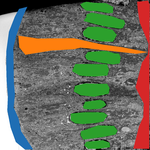
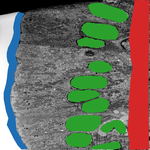
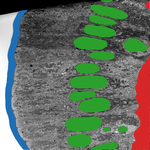
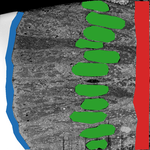
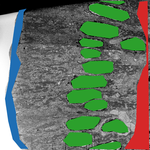
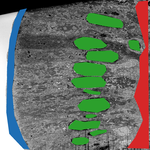
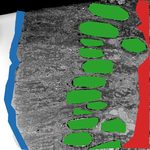
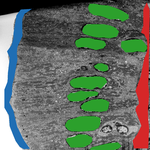
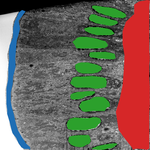
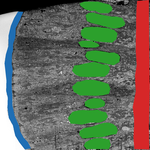
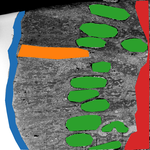
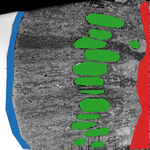
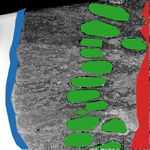
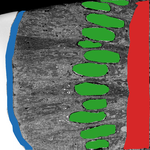
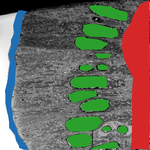
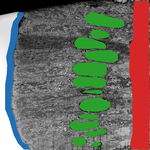
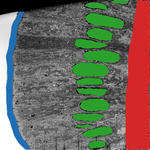
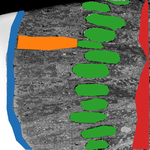
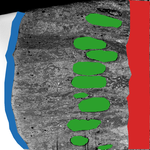
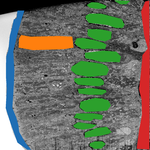
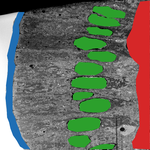
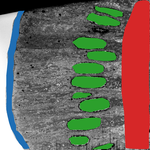
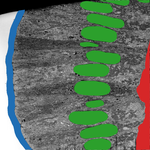
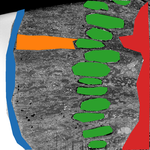
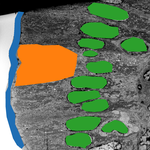
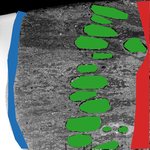
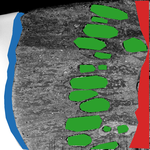
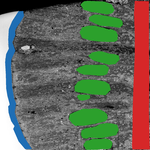
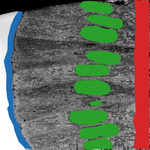
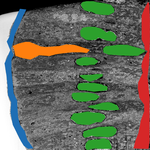
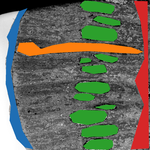
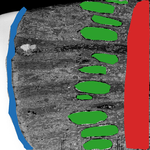
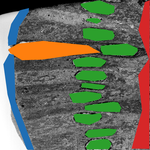
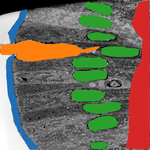
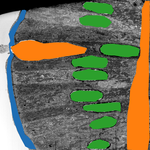
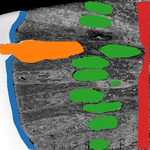
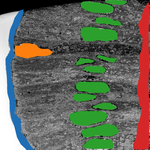
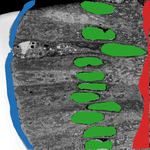
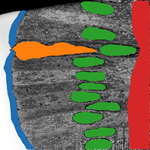
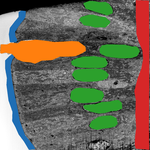
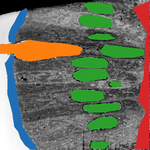
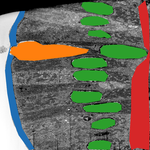
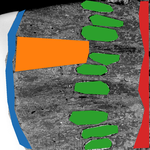
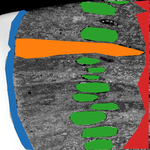
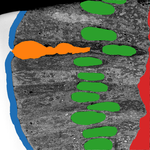
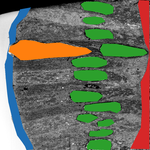
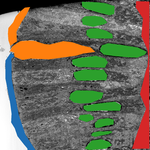
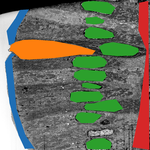

In [93]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df

In [ ]:
df